# Netflix (NFLX) Stock Price prediction using Facebook Prophet 

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
#read_csv function from pandas

In [ ]:
df = pd.read_csv("NFLX.csv")

In [ ]:
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2020-03-16   93.900002   98.973999   88.433998   89.014000   89.014000   
1    2020-03-17   88.001999   94.370003   79.199997   86.040001   86.040001   
2    2020-03-18   77.800003   80.972000   70.101997   72.244003   72.244003   
3    2020-03-19   74.940002   90.400002   71.692001   85.528000   85.528000   
4    2020-03-20   87.639999   95.400002   85.157997   85.505997   85.505997   
..          ...         ...         ...         ...         ...         ...   
246  2021-03-08  600.549988  620.130005  558.789978  563.000000  563.000000   
247  2021-03-09  608.179993  678.090027  595.210022  673.580017  673.580017   
248  2021-03-10  700.299988  717.849976  655.059998  668.059998  668.059998   
249  2021-03-11  699.400024  702.500000  677.179993  699.599976  699.599976   
250  2021-03-12  670.000000  694.880005  666.140015  693.729980  693.729980   

        Volume  
0    102447500  
1    119973000  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
px.line(data_frame=df, x='Date', y= 'Close')

In [ ]:
px.area(data_frame=df, x='Date', y= 'Close')

In [ ]:
px.line(data_frame=df, x='Date', y= 'Volume')

In [ ]:
px.area(data_frame=df, x='Date', y= 'Volume')

# Understanding Facebook Prophet

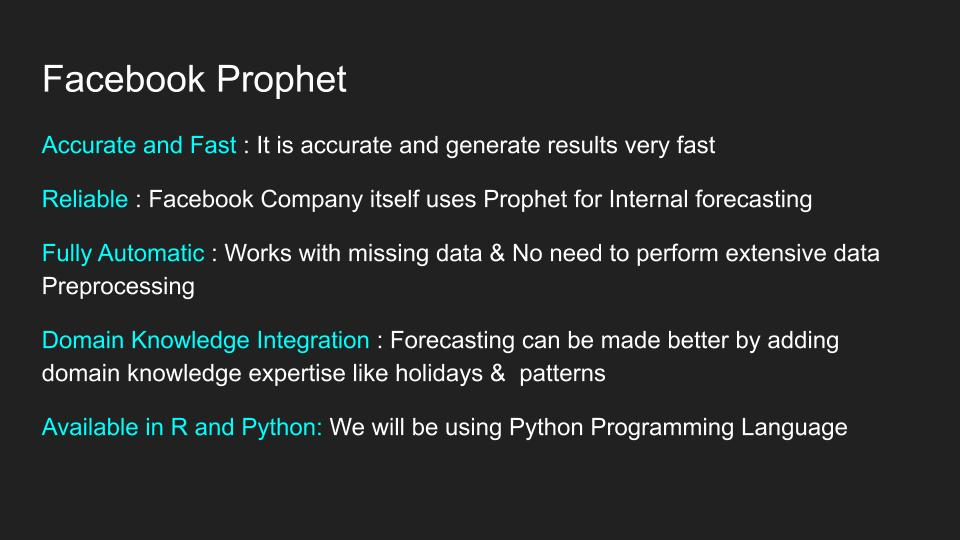

## Data Preperation

In [ ]:
pdf = df[['Date','Close']]
pdf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [ ]:
 pdf = pdf.rename(columns = {'Date':'ds','Close':'y'})

## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(pdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8g5ex5u/8jl2urwz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf8g5ex5u/t4chy_5c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61961', 'data', 'file=/tmp/tmpf8g5ex5u/8jl2urwz.json', 'init=/tmp/tmpf8g5ex5u/t4chy_5c.json', 'output', 'file=/tmp/tmpf8g5ex5u/prophet_modelc95zpml8/prophet_model-20230503104326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:43:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:43:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)

In [ ]:
forecast = m.predict(future)
print(forecast)

            ds       trend  yhat_lower   yhat_upper  trend_lower  trend_upper  \
0   2020-03-16   65.599460  -23.466582   146.269247    65.599460    65.599460   
1   2020-03-17   67.394950  -28.775546   156.412403    67.394950    67.394950   
2   2020-03-18   69.190441  -16.373319   148.985163    69.190441    69.190441   
3   2020-03-19   70.985932  -20.058861   145.524373    70.985932    70.985932   
4   2020-03-20   72.781423  -19.216377   157.563362    72.781423    72.781423   
..         ...         ...         ...          ...          ...          ...   
276 2021-04-07  900.291503  812.377137   982.442708   899.197267   901.444135   
277 2021-04-08  902.748588  808.077701   990.679928   901.597149   903.981070   
278 2021-04-09  905.205673  804.968661   986.165127   903.974495   906.531580   
279 2021-04-10  907.662758  834.455014  1009.165003   906.379499   909.073369   
280 2021-04-11  910.119844  831.484989  1001.753735   908.783054   911.613483   

     additive_terms  additi

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
px.line(forecast, x='ds',y='yhat')

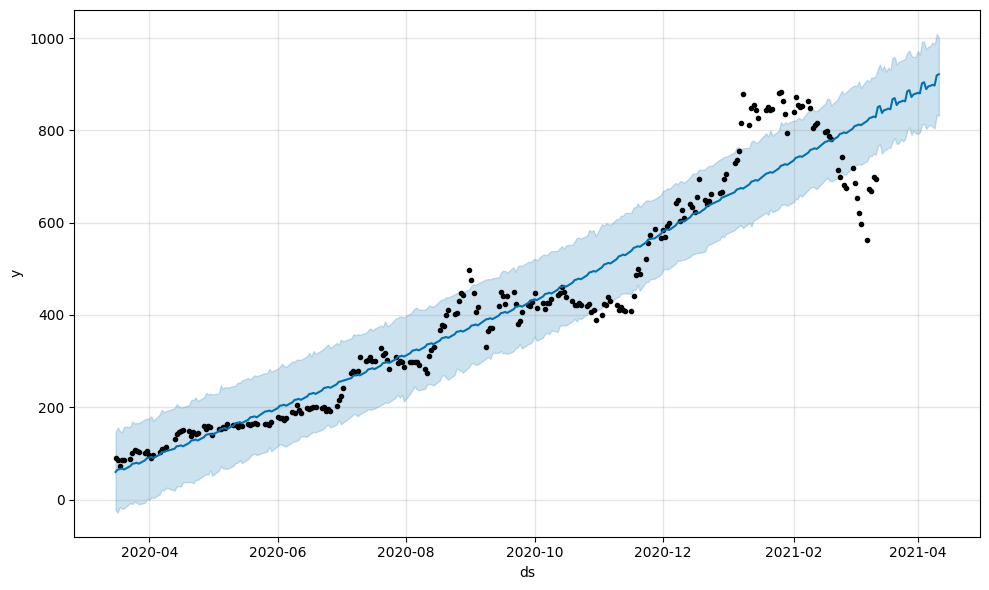

In [ ]:
fig = m.plot(forecast, xlabel = 'ds',ylabel = 'y')

In [ ]:
fig2 = m.plot_components

##Downloading the Forecast data

In [ ]:
from google.colab import files

In [ ]:
forecast.to_csv('forecast.csv')

In [ ]:
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>